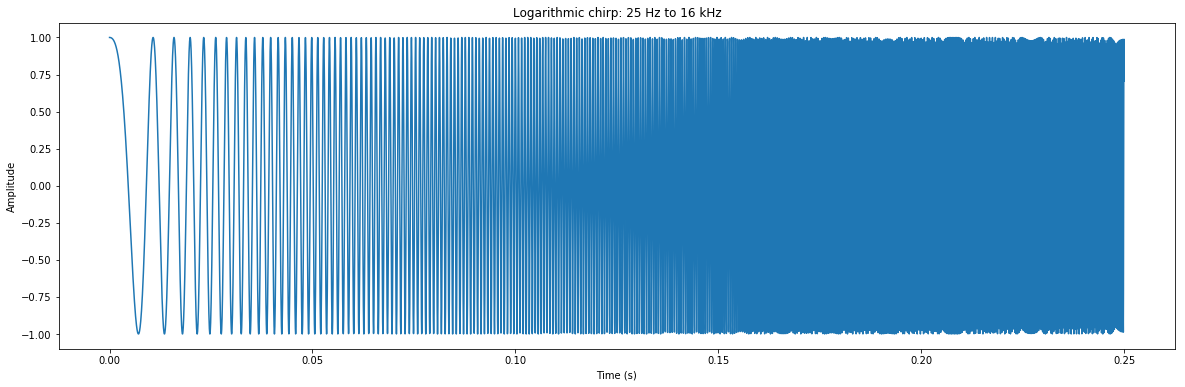

In [2]:
%matplotlib inline

import scipy
from scipy import signal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

n = 32000//4
xs = np.linspace(0, n/32000, n)
ys = scipy.signal.chirp(xs, 25, 0.25, 3200, method='linear')


f = plt.figure(figsize=(20, 6))
ax = f.add_subplot(1, 1, 1,
                   title='Logarithmic chirp: 25 Hz to 16 kHz',
                   xlabel='Time (s)', ylabel='Amplitude')
ax.plot(xs, ys)

import IPython.display

IPython.display.Audio(ys, rate=32000)


In [3]:
fs = 32000
fs_nyquist = fs // 2

plotn = 3200

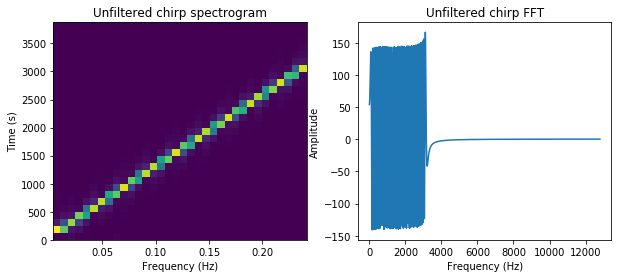

In [4]:

fig = plt.figure(figsize=(10, 4))

f, t, spec = scipy.signal.spectrogram(ys, fs)
ax = fig.add_subplot(1, 2, 1,
                    title='Unfiltered chirp spectrogram',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 2, 2,
                    title='Unfiltered chirp FFT',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys)
f = np.fft.rfftfreq(n, 1/fs)
ax.plot(f[:plotn], sp.real[:plotn])

None

In [5]:
N = 4
fstop1 = 300 / fs_nyquist
fstop2 = 800 / fs_nyquist
print('order:', N)
print('fs:', fs, 'nyquist:', fs_nyquist)
print('fstop1:', fstop1, 'fstop2:', fstop2)
print()

b, a = scipy.signal.butter(N, (fstop1, fstop2), btype='bandpass', analog=False, output='ba')
sos_butter = scipy.signal.butter(N, (fstop1, fstop2), btype='bandpass', analog=False, output='sos')
print('bs:', b)
print('as:', a)
print()
print('SOS:', sos_butter)
print()
print(sum(len(a) for a in sos), 'coefficients')

ys_butter = scipy.signal.lfilter(b, a, ys)

fig = plt.figure(figsize=(17, 4))

f, t, spec = scipy.signal.spectrogram(ys_butter, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: Butterworth bandpass',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: Butterworth bandpass',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_butter)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: Butterworth bandpass',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(b, a, plot=ax.plot)
None



order: 4
fs: 32000 nyquist: 16000
fstop1: 0.01875 fstop2: 0.05

bs: [ 5.12320597e-06  0.00000000e+00 -2.04928239e-05  0.00000000e+00
  3.07392358e-05  0.00000000e+00 -2.04928239e-05  0.00000000e+00
  5.12320597e-06]
as: [  1.          -7.70768122  26.02927945 -50.3036136   60.84900164
 -47.17652194  22.8938119   -6.35790442   0.77362822]

SOS: [[ 5.12320597e-06  1.02464119e-05  5.12320597e-06  1.00000000e+00
  -1.88200268e+00  8.95569476e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.92539642e+00  9.31169369e-01]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.92504862e+00  9.47724165e-01]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.97523350e+00  9.78864062e-01]]



NameError: name 'sos' is not defined

In [ ]:
from scipy import signal

N = 103
hs_firwin = signal.firwin(N, (300, 800), pass_zero=False, fs=fs)
ys_firwin = signal.lfilter(hs_firwin, 1.0, ys)

print(len(hs_firwin))
with open('Src/fir.c', 'w') as f:
    f.write("""const unsigned char firCoeffsRaw[] = {{
{}
}};

const float *const firCoeffs = (float *)firCoeffsRaw;
""".format(', '.join(map(hex, np.array(hs_firwin, dtype=np.float32).tobytes()))))

fig = plt.figure(figsize=(17, 4))

f, t, spec = scipy.signal.spectrogram(ys_firwin, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: FIR window',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: FIR window',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_firwin)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: FIR window',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(hs, plot=ax.plot)
None

In [ ]:
from scipy import signal

nyquist = fs_nyquist
N = 103

fstop1 = 300
fstop2 = 800
hs_firwin2 = signal.firwin2(N, (0.0, fstop1-100, fstop1, fstop2, fstop2+100, nyquist), (0.0, 0.0, 1.0, 1.0, 0.0, 0.0), fs=fs)
ys_firwin2 = signal.lfilter(hs_firwin2, 1.0, ys)


fig = plt.figure(figsize=(15, 4))

f, t, spec = scipy.signal.spectrogram(ys_firwin2, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: FIR window 2',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
print(spec.shape)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: FIR window 2',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_firwin2)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: FIR window 2',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(hs, plot=ax.plot)
None

In [ ]:
from scipy import signal

N = 73

hs_firls = np.array(signal.firls(N, (0.0, fstop1-100, fstop1, fstop2, fstop2+100, nyquist), (0.0, 0.0, 1.0, 1.0, 0.0, 0.0), fs=fs), dtype=np.float32)

ys_firls = signal.lfilter(hs_firls, 1.0, ys)


fig = plt.figure(figsize=(15, 4))

f, t, spec = scipy.signal.spectrogram(ys_firls, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: FIR least-squares',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: FIR least-squares',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_firls)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: FIR least-squares',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(hs, plot=ax.plot)
None

In [ ]:
from scipy import signal

fpass1 = 300 / nyquist
fpass2 = 800 / nyquist
fstop1 = 200 / nyquist
fstop2 = 900 / nyquist
b_iir, a_iir = signal.iirdesign((fpass1, fpass2), (fstop1, fstop2), 1, 23, ftype='ellip')
sos_iir = signal.iirdesign((fpass1, fpass2), (fstop1, fstop2), 1, 23, ftype='ellip', output='sos')

print(b_iir, len(b_iir))
print(a_iir, len(a_iir))
print(sos_iir)
#with open('Src/iir.c', 'w') as f:
#    f.write("""const float iirCoeffsRaw[] = {{
#{}
#}};

#const float *const iirCoeffs = (float *)iirCoeffsRaw;""".format())

ys_iirellip = signal.lfilter(b_iir, a_iir, ys)


fig = plt.figure(figsize=(15, 4))

f, t, spec = scipy.signal.spectrogram(ys_iirellip, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: IIR elliptic',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: IIR elliptic',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_iirellip)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: IIR elliptic',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(hs, plot=ax.plot)
None

-----------------------------

Now let's make some noise! (and filter it!)

In [ ]:
import random as rand

rand.seed(649)

n = 32000//8
xs = np.linspace(0, n/32000, n)
#ys = scipy.signal.chirp(xs, 25, 0.25, 3200, method='linear')
ys = np.array([rand.uniform(-1, 1) for _ in range(n)], dtype=np.float32)
print(ys[:64])

f = plt.figure(figsize=(20, 6))
ax = f.add_subplot(1, 1, 1,
                   title='Test noise',
                   xlabel='Time (s)', ylabel='Amplitude')
ax.plot(xs, ys)

IPython.display.Audio(ys, rate=32000)


In [ ]:

fig = plt.figure(figsize=(5, 4))

ax = fig.add_subplot(1, 1, 1,
                    title='Unfiltered noise FFT',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys)
f = np.fft.rfftfreq(n, 1/fs)
ax.plot(f[:plotn], sp.real[:plotn])

None

In [ ]:
# ------------------------------
# Butterworth
# ------------------------------

ys_butter = scipy.signal.sosfilt(sos_butter, ys)

fig = plt.figure(figsize=(17, 19))

ax = fig.add_subplot(3, 2, 1,
                    title='Filtered noise FFT: Butterworth bandpass',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_butter)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])



# ------------------------------
# FIR window
# ------------------------------

ys_firwin = signal.lfilter(hs_firwin, 1.0, ys)

ax = fig.add_subplot(3, 2, 2,
                    title='Filtered chirp FFT: FIR window',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_firwin)
f = np.fft.rfftfreq(n, 1/fs)
ax.plot(f[:plotn], sp.real[:plotn])



# ------------------------------
# FIR window 2
# ------------------------------

ys_firwin2 = signal.lfilter(hs_firwin2, 1.0, ys)

ax = fig.add_subplot(3, 2, 3,
                    title='Filtered chirp FFT: FIR window 2',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_firwin2)
f = np.fft.rfftfreq(n, 1/fs)
ax.plot(f[:plotn], sp.real[:plotn])



# ------------------------------
# FIR least-squares
# ------------------------------

ys_firls = signal.lfilter(hs_firls, 1.0, ys)

ax = fig.add_subplot(3, 2, 4,
                    title='Filtered chirp FFT: FIR least-squares',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_firls)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])



# ------------------------------
# IIR (elliptical)
# ------------------------------

ys_iirellip = signal.lfilter(b_iir, a_iir, ys)

ax = fig.add_subplot(3, 2, 5,
                    title='Filtered chirp FFT: IIR elliptic',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.rfft(ys_iirellip)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


None

In [ ]:

import os
print(os.getcwd())
cmsis_out = np.fromfile('fir_out.bin', dtype=np.float32)

print(len(cmsis_out), len(ys_firwin))
print(cmsis_out[1:16])
print(cmsis_out[-15:])
print(ys_firwin[:15])
print(ys_firwin[-16:-1])


In [ ]:

from statistics import mean
from math import sqrt

def rmse(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))
    #return sqrt(mean((x1 - x2)**2 for x1 in v1 for x2 in v2))



# scipy impl vs CMSIS f32 FIR
rmse(ys_firwin[:-1], cmsis_out[1:])

In [ ]:
fir_f32 = np.fromfile('arm_fir_f32.bin', dtype=np.float32)
fir_q31 = np.fromfile('arm_fir_q31.bin', dtype=np.float32)

rmse(fir_f32, fir_q31)

In [ ]:
iir_f32 = np.fromfile('arm_biquad_cascade_df2T_f32.bin', dtype=np.float32)
iir_q31 = np.fromfile('arm_biquad_cas_df1_32x64_q31.bin', dtype=np.float32)

rmse(iir_f32, iir_q31)

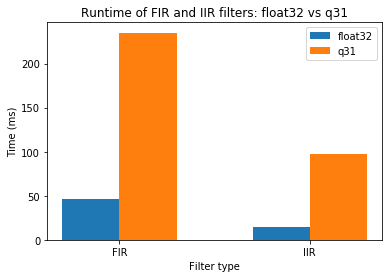

In [8]:
import itertools as it

firt = [46, 235] # in ms
fire = [1074.711, 5598.398] # in uJ
iirt = [15, 97]
iire = [341.778, 2742.475]

f32t = [46, 15]
q31t = [235, 97]


fig, ax = plt.subplots()
xs = np.arange(len(firt))
width = 0.3
f32_ax = ax.bar(xs, f32t, width)
ax.set_xticks(xs+width/2)
ax.set_xticklabels(('FIR', 'IIR'))
q31_ax = ax.bar(xs+0.3, q31t, width)

ax.set_xlabel('Filter type')
ax.set_ylabel('Time (ms)')
ax.set_title('Runtime of FIR and IIR filters: float32 vs q31')
ax.legend((f32_ax[0], q31_ax[0]), ('float32', 'q31'))

fig.savefig('times.png')

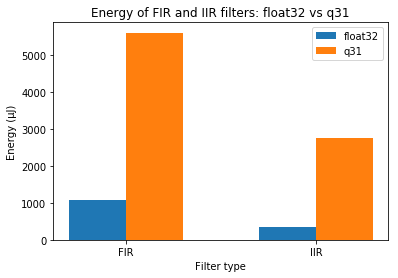

In [9]:

f32e = [1074.711, 341.778]
q31e = [5598.398, 2742.475]

fig, ax = plt.subplots()
xs = np.arange(len(firt))
width = 0.3
f32_ax = ax.bar(xs, f32e, width)
ax.set_xticks(xs+width/2)
ax.set_xticklabels(('FIR', 'IIR'))
q31_ax = ax.bar(xs+0.3, q31e, width)

ax.set_title('Energy of FIR and IIR filters: float32 vs q31')
ax.set_xlabel('Filter type')
ax.set_ylabel('Energy (μJ)')

ax.legend((f32_ax[0], q31_ax[0]), ('float32', 'q31'))
fig.savefig('energy.png')

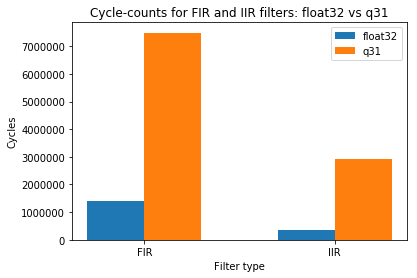

In [10]:
f32c = [1402531, 371215]
q31c = [7487194, 2915553]

fig, ax = plt.subplots()
xs = np.arange(len(firt))
width = 0.3
ax.set_xticks(xs+width/2)
ax.set_xticklabels(('FIR', 'IIR'))
f32_ax = ax.bar(xs, f32c, width)
q31_ax = ax.bar(xs+0.3, q31c, width)

ax.set_title('Cycle-counts for FIR and IIR filters: float32 vs q31')
ax.set_xlabel('Filter type')
ax.set_ylabel('Cycles')

ax.legend((f32_ax[0], q31_ax[0]), ('float32', 'q31'))
fig.savefig('energy.png')